<a href="https://colab.research.google.com/github/Hydixoo/PIS/blob/main/PIS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
# data import

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
    header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [3]:
names = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['ID'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [4]:
data['Class'].replace({1: "building_float",
                       2: "building_non_float",
                       3: "vehicle_float",
                       4: "vehicle_non_float",
                       5: "containers",
                       6: "tableware",
                       7: "headlamps"
                      }, inplace=True)
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_float


In [5]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col] = np.nan

data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,0.00,building_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_float
2,1.51618,13.53,3.55,NaN,NaN,0.39,7.78,0.0,0.00,building_float
3,1.51766,13.21,NaN,1.29,72.61,0.57,8.22,0.0,0.00,building_float
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_float
5,1.51596,NaN,3.61,1.62,72.97,NaN,8.07,0.0,NaN,building_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,building_float
7,1.51756,13.15,3.61,NaN,73.24,0.57,8.24,0.0,0.00,building_float
8,NaN,14.04,3.58,1.37,NaN,0.56,8.30,0.0,0.00,building_float
9,1.51755,13.00,3.60,1.36,NaN,0.57,8.40,0.0,0.11,building_float


In [6]:
# data visualization

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      199 non-null    float64
 1   Na      201 non-null    float64
 2   Mg      203 non-null    float64
 3   Al      203 non-null    float64
 4   Si      201 non-null    float64
 5   K       197 non-null    float64
 6   Ca      203 non-null    float64
 7   Ba      195 non-null    float64
 8   Fe      199 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,199.000000,201.000000,203.000000,203.000000,201.000000,197.000000,203.000000,195.000000,199.000000
mean,1.518445,13.396816,2.657635,1.452315,72.637214,0.504264,8.946453,0.189282,0.056231
std,0.003109,0.807426,1.457318,0.497802,0.790614,0.675492,1.439367,0.518018,0.097294
min,1.511150,10.730000,0.000000,0.340000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516540,12.930000,1.865000,1.190000,72.260000,0.120000,8.225000,0.000000,0.000000
50%,1.517690,13.300000,3.480000,1.370000,72.780000,0.560000,8.590000,0.000000,0.000000
75%,1.519300,13.800000,3.605000,1.635000,73.080000,0.610000,9.160000,0.000000,0.095000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [8]:
display(data['Class'].describe())
print('============================')
display(data['Class'].value_counts())

count                    203
unique                     6
top       building_non_float
freq                      70
Name: Class, dtype: object

building_non_float    70
building_float        68
headlamps             27
vehicle_float         16
containers            13
tableware              9
Name: Class, dtype: int64

In [9]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage = 100*data[col].isna().sum()/len(data[col])
  print("Column",col,"contains",missing_values_counts, "NULL values (", percentage, "% ).")

Column RI contains 15 NULL values ( 7.009345794392523 % ).
Column Na contains 13 NULL values ( 6.074766355140187 % ).
Column Mg contains 11 NULL values ( 5.140186915887851 % ).
Column Al contains 11 NULL values ( 5.140186915887851 % ).
Column Si contains 13 NULL values ( 6.074766355140187 % ).
Column K contains 17 NULL values ( 7.94392523364486 % ).
Column Ca contains 11 NULL values ( 5.140186915887851 % ).
Column Ba contains 19 NULL values ( 8.878504672897197 % ).
Column Fe contains 15 NULL values ( 7.009345794392523 % ).
Column Class contains 11 NULL values ( 5.140186915887851 % ).


#Гистограммы

In [10]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

(array([ 8., 19., 50., 68., 30., 14.,  6.,  4.,  3.,  1.]),
 array([0.34 , 0.656, 0.972, 1.288, 1.604, 1.92 , 2.236, 2.552, 2.868,
        3.184, 3.5  ]),
 <a list of 10 Patch objects>)

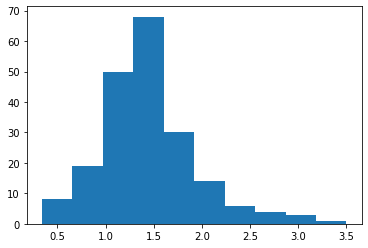

In [11]:
col = 'Al'
plt.hist(data[col])

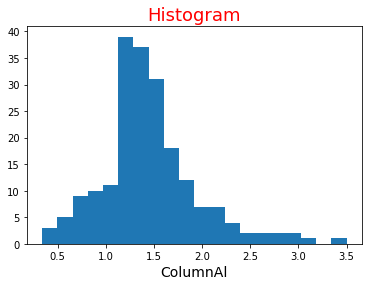

In [12]:
fig, ax = plt.subplots()

ax.hist(data[col], bins=20)
ax.set_xlabel("Column"+str(col), fontsize=14)
ax.set_title("Histogram", color='red', fontsize=18)

plt.show()

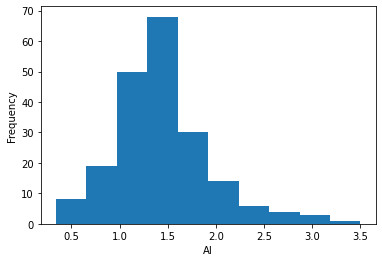

In [13]:
ax = data[col].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

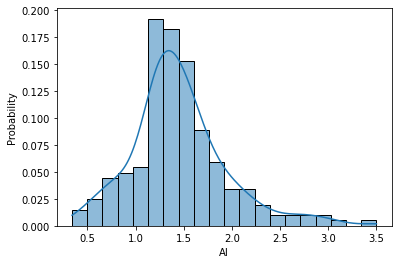

In [14]:
sns.histplot(data=data,x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show()

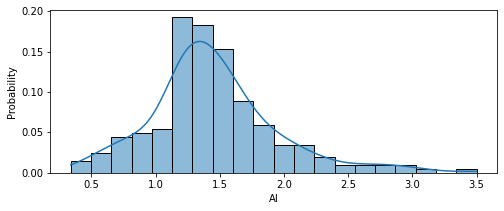

In [15]:
plt.figure(figsize=(8,3))
ax = sns.histplot(data=data,x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show()

# Bar plot

In [16]:
col = 'Class'

In [17]:
df1 = data[col].value_counts()
df1

building_non_float    70
building_float        68
headlamps             27
vehicle_float         16
containers            13
tableware              9
Name: Class, dtype: int64

In [18]:
df1.index.values

array(['building_non_float', 'building_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

In [19]:
df1.values

array([70, 68, 27, 16, 13,  9])

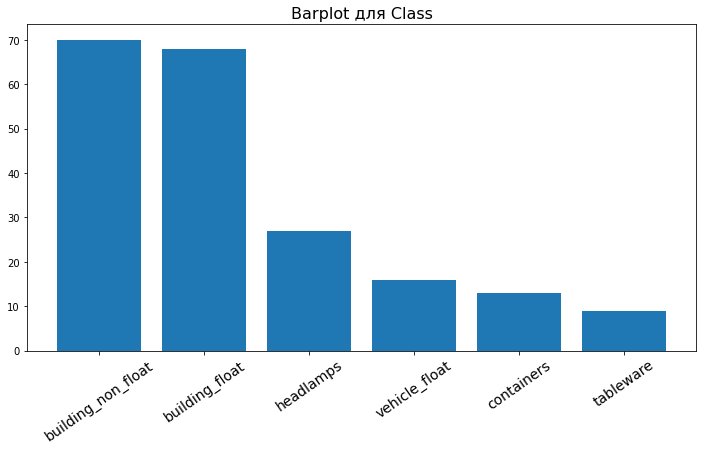

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(data[col].value_counts().index.values,
       data[col].value_counts().values)

ax.set_xlabel(None,fontsize=16)
ax.set_title('Barplot для '+str(col), fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=14, rotation=35)

plt.show()

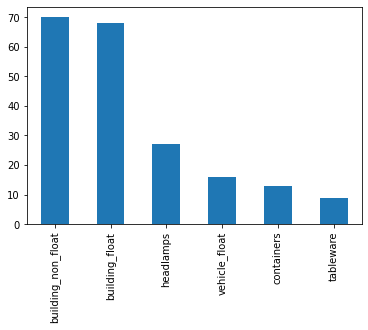

In [21]:
data[col].value_counts().plot(kind='bar')
plt.show()

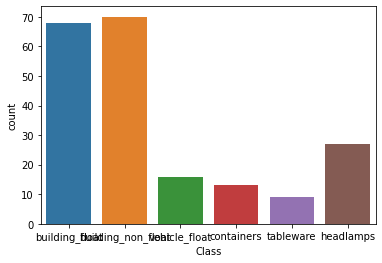

In [22]:
sns.countplot(data=data, x=col)
plt.show()

# Домашнее задание
Виджеты, выпадающий список с названиями столбцов, показать гистограмму
В последнем столбце bar plot


---


С помощью виджетов сделать отрисовку всех переменных на выбор: boxplot или парные графики


---

Заполнить ещё 1 датафрейм по категориям

# Ящик с усами

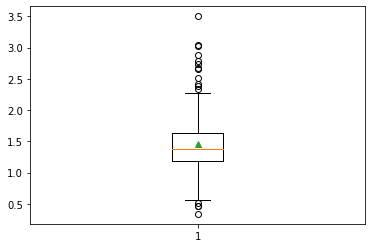

In [23]:
col='Al'

fig, ax = plt.subplots()
ax.boxplot(data[col][~np.isnan(data[col])], showmeans=True)

plt.show()

In [24]:
~np.isnan(data[col])

0       True
1       True
2      False
3       True
4       True
       ...  
209     True
210     True
211     True
212     True
213     True
Name: Al, Length: 214, dtype: bool

In [25]:
data[col][~np.isnan(data[col])]

0      1.10
1      1.36
3      1.29
4      1.24
5      1.62
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 203, dtype: float64

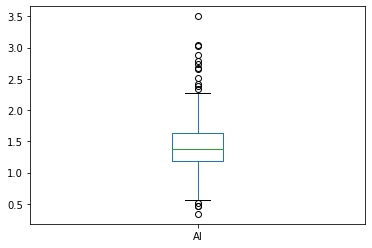

In [26]:
data[col].plot(kind='box')
plt.show()

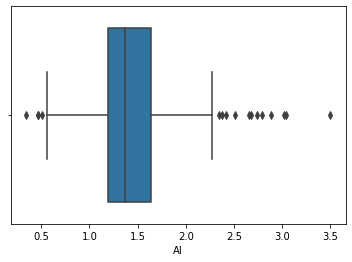

In [27]:
sns.boxplot(data=data, x=col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


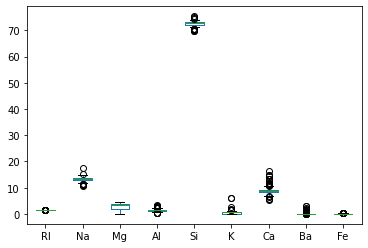

In [28]:
data.plot(kind='box')
plt.show()

In [29]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [30]:
data.columns.values != 'Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [31]:
data.columns.values[data.columns.values != 'Si']

array(['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


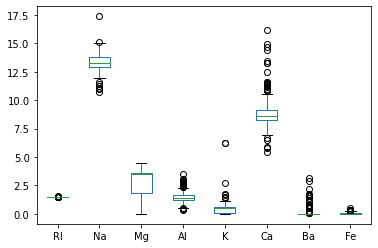

In [32]:
data[data.columns.values[data.columns.values != 'Si']].plot(kind='box')
plt.show()

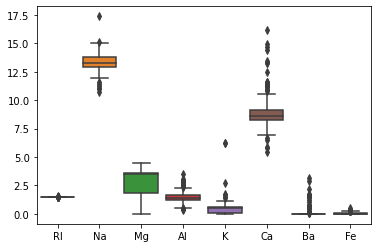

In [33]:
sns.boxplot(data=data[data.columns.values[data.columns.values != 'Si']])
plt.show()

# Масштабирование

In [34]:
import sklearn.preprocessing as prp

In [35]:
obj = Model
obj.fit
obj.predict / obj.transform
(obj.fit_transform)

NameError: ignored

In [37]:
scaler1 = prp.MinMaxScaler()
datascaled1 = scaler1.fit_transform(data[data.columns.values[data.columns.values != 'Class']])
datascaled1 = pd.DataFrame(datascaled1,
                           columns=data.columns.values[data.columns.values != 'Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


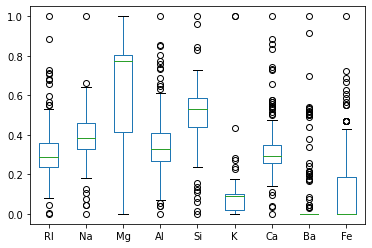

In [38]:
datascaled1.plot(kind='box')
plt.show()

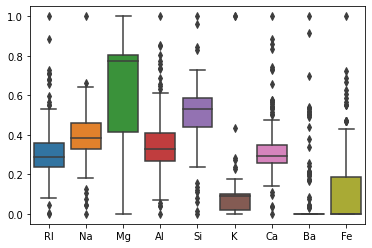

In [39]:
sns.boxplot(data=datascaled1)
plt.show()

In [40]:
scaler2 = prp.StandardScaler()
datascaled2 = scaler2.fit_transform(data[data.columns.values[data.columns.values != 'Class']])
datascaled2 = pd.DataFrame(datascaled2,
                           columns=data.columns.values[data.columns.values != 'Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


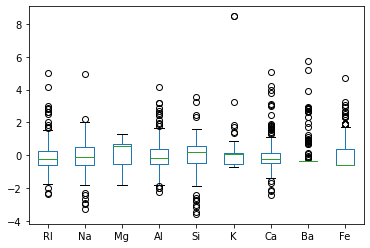

In [41]:
datascaled2.plot(kind='box')
plt.show()

# Парные графики

In [42]:
col1 = 'Mg'
col2 = 'Fe'

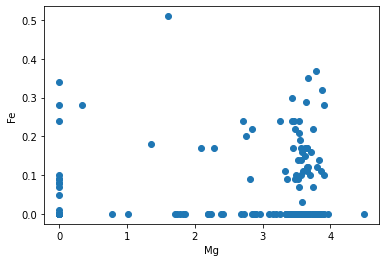

In [43]:
fig, ax = plt.subplots()

ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_ylabel(col2)

plt.show()

In [44]:
df1 = data['Class'].value_counts()
df1.index.values

array(['building_non_float', 'building_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

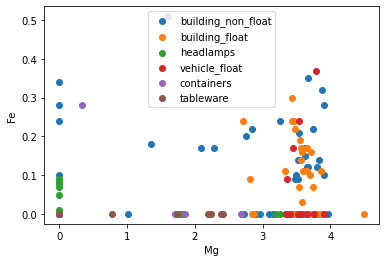

In [45]:
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][data['Class']==glassType],
             data[col2][data['Class']==glassType],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


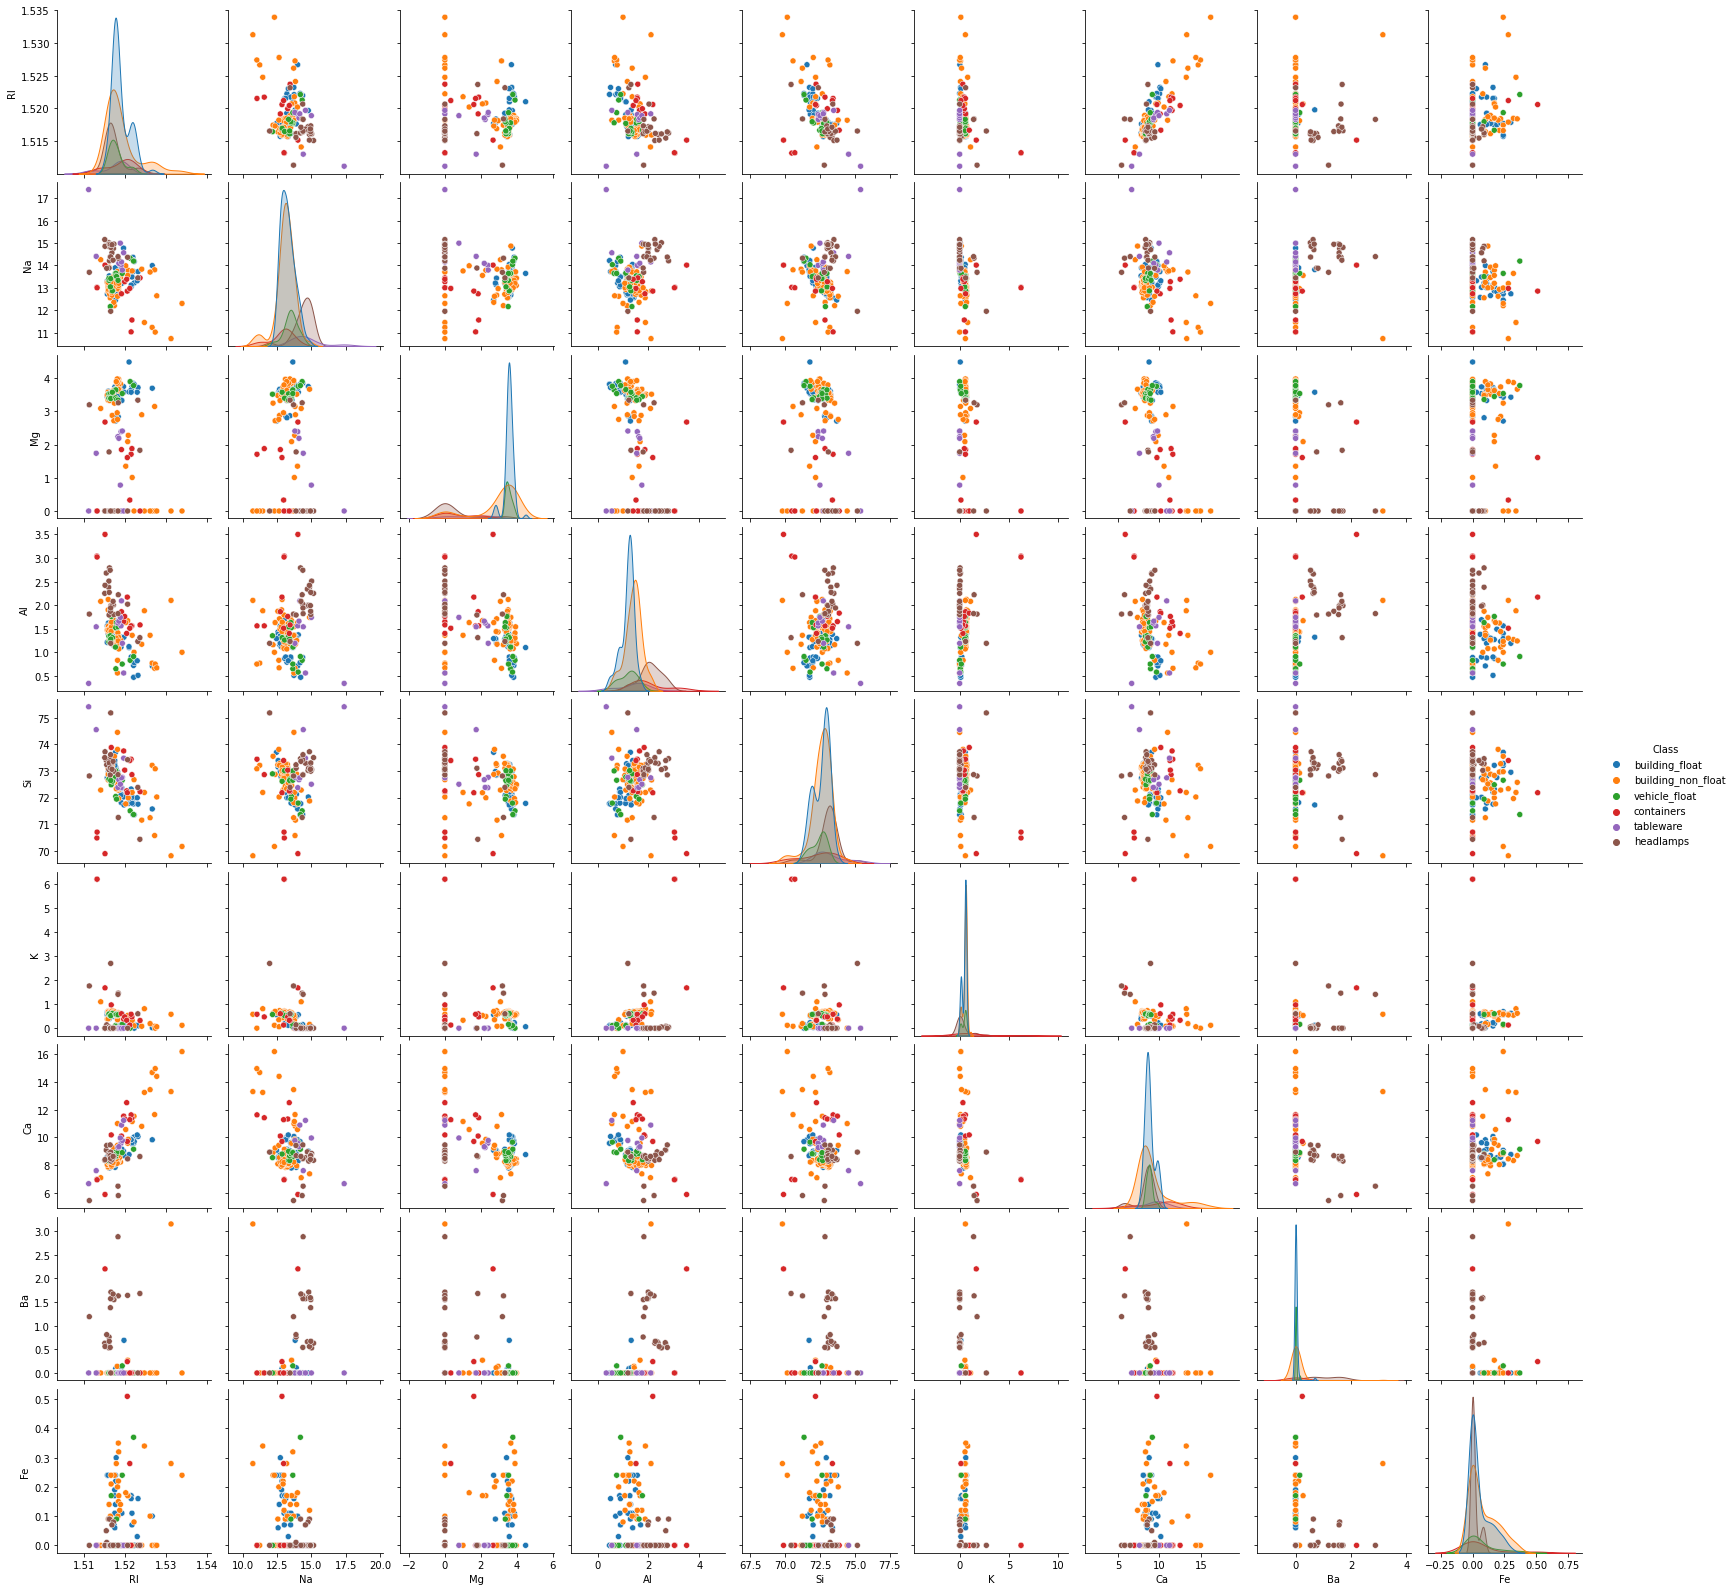

In [46]:
sns.pairplot(data=data, hue='Class')
plt.show()

#NaN

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      199 non-null    float64
 1   Na      201 non-null    float64
 2   Mg      203 non-null    float64
 3   Al      203 non-null    float64
 4   Si      201 non-null    float64
 5   K       197 non-null    float64
 6   Ca      203 non-null    float64
 7   Ba      195 non-null    float64
 8   Fe      199 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [49]:
data_fillna_mean = data.fillna(data.mean()).copy()

In [55]:
data_fillna_mean.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518445,13.396816,2.657635,1.452315,72.637214,0.504264,8.946453,0.189282,0.056231
std,0.002998,0.782398,1.419189,0.484778,0.766108,0.647976,1.401707,0.494374,0.093805
min,1.511150,10.730000,0.000000,0.340000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516623,12.972500,2.192500,1.202500,72.322500,0.142500,8.247500,0.000000,0.000000
50%,1.517840,13.350000,3.455000,1.410000,72.745000,0.540000,8.630000,0.000000,0.000000
75%,1.519105,13.745000,3.597500,1.627500,73.060000,0.600000,9.117500,0.067500,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [52]:
data['Class'].value_counts()

building_non_float    70
building_float        68
headlamps             27
vehicle_float         16
containers            13
tableware              9
Name: Class, dtype: int64

In [53]:
data['Class'].value_counts().index.values[0]

'building_non_float'

In [56]:
data['Class'].mode()

0    building_non_float
dtype: object

In [57]:
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0],
                                 inplace=True)

#PCA

In [59]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca.explained_variance_ratio_*100

array([4.70393771e+01, 2.63946654e+01, 1.06104339e+01, 1.00706260e+01,
       3.57079739e+00, 1.67248988e+00, 5.06269549e-01, 1.35319556e-01,
       2.13007132e-05])

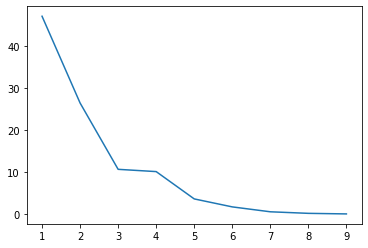

In [63]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,10), pca.explained_variance_ratio_*100)
plt.show()

In [64]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']])

In [65]:
datapca = pd.DataFrame(rez)
datapca.head(3)

,0,1,2,3,4,5,6,7,8
0,-1.431511,-1.146751,0.058045,-1.045180,0.213887,0.041662,-0.052563,-0.067040,-0.000628
1,-1.464310,0.282703,-0.258016,-0.306131,-0.217258,-0.029662,-0.018782,-0.040163,-0.000931
2,-1.449452,0.201237,-0.136186,-0.117823,0.012641,-0.137586,0.176208,-0.052357,0.000628


In [67]:
pcanames=[]
for i in range(9):
  pcanames.append('pc'+str(i+1))

datapca.columns=pcanames
datapca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.431511,-1.146751,0.058045,-1.045180,0.213887,0.041662,-0.052563,-0.067040,-0.000628
1,-1.464310,0.282703,-0.258016,-0.306131,-0.217258,-0.029662,-0.018782,-0.040163,-0.000931
2,-1.449452,0.201237,-0.136186,-0.117823,0.012641,-0.137586,0.176208,-0.052357,0.000628
3,-0.521236,0.294370,0.071735,0.218551,-0.071479,0.059882,0.457231,-0.063456,-0.000019
4,-1.317666,-0.057527,-0.363014,0.326476,-0.068119,0.085327,-0.008033,-0.052086,-0.000691


In [68]:
datapca['Class'] = data_fillna_mean['Class'].copy()

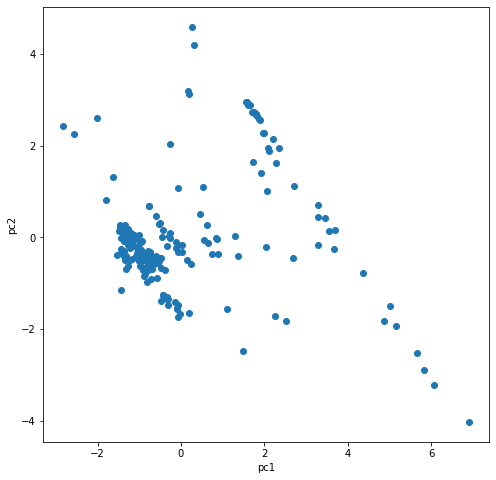

In [70]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(datapca['pc1'], datapca['pc2'])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

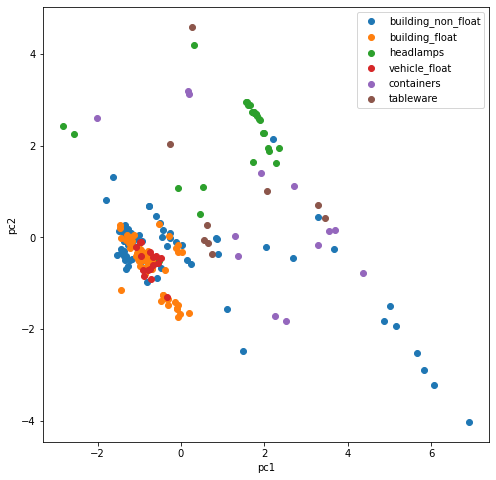

In [73]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in datapca['Class'].value_counts().index.values:
  ax.scatter(datapca[col1][datapca['Class']==glassType],
             datapca[col2][datapca['Class']==glassType],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

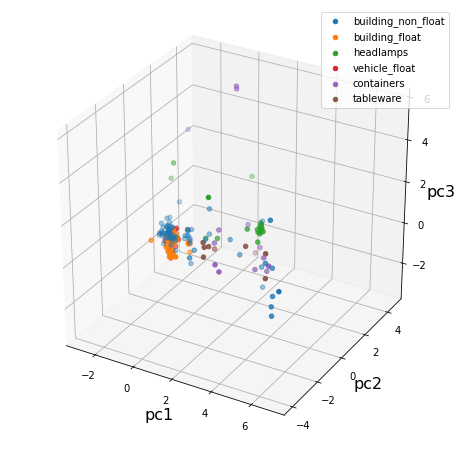

In [75]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in datapca['Class'].value_counts().index.values:
  ax.scatter(datapca['pc1'][datapca['Class']==glassType],
             datapca['pc2'][datapca['Class']==glassType],
             datapca['pc3'][datapca['Class']==glassType],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

In [ ]:
import